### Instead of resampling randoms, weigh randoms by their fc. 

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys; sys.path.insert(0, '/global/homes/e/elliek/kdcount')

from kdcount import KDTree, KDAttr
from kdcount.utils import constant_array

import healpy

import numpy as np
from numpy.testing import assert_equal, run_module_suite
from scipy.interpolate import griddata

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import rcParams
rcParams["image.interpolation"] = "nearest"
rcParams["image.aspect"] = "equal"

In [12]:
catdir = '/global/homes/e/elliek/imaginglss/imaginglss/nersc/ELG/'
ra_gal, dec_gal = np.loadtxt(catdir+'ELG.txt.FLUXES', usecols=(0,1), unpack=True)
ra_ran, dec_ran = np.loadtxt(catdir+'ELG_rand.txt.NOISES', usecols=(0,1), unpack=True)
fc_ran = np.loadtxt(catdir+'ELG_rand.txt.FC', unpack=True)

In [13]:
print len(fc_ran)
print len(ra_gal)

19130301
1939044


In [14]:
nside = 2**8

In [25]:
pid_gal = healpy.ang2pix(nside, pi * (0.5 - dec_gal / 180), ra_gal / 180 * pi)
pid_ran = healpy.ang2pix(nside, pi * (0.5 - dec_ran / 180), ra_ran / 180 * pi)

In [26]:
ngal = bincount(pid_gal, minlength = healpy.nside2npix(nside))
nran = bincount(pid_ran, weights = fc_ran, minlength = healpy.nside2npix(nside))

In [35]:
rescale = len(ra_ran)*1.0/len(ra_gal)
print rescale
nran = nran/rescale
# Fix 0/0 issue
nran[((ngal==0) & (nran==0))] = 1e-20

9.86584162092


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':


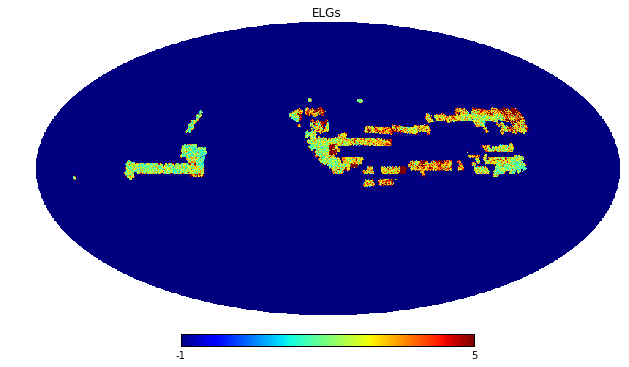

In [36]:
healpy.mollview(ngal/nran-1, max=5, rot=(-120,0,0), title='ELGs')